<a href="https://colab.research.google.com/github/ZenShirogan/Drug_Dection_Web/blob/main/drug_dect_after_oversampling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

# Importing the DataSet and Interpreting the target and inputs variable 

In [ ]:
df = pd.read_csv("/content/drugcsv.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             211 non-null    object
 1   Gender                          211 non-null    object
 2   Education                       211 non-null    object
 3   Enjoyable with-                 211 non-null    object
 4   Live with                       211 non-null    object
 5   Conflict with law               211 non-null    object
 6   Motive about drug               211 non-null    object
 7   Spend most time                 211 non-null    object
 8   Failure in life                 211 non-null    object
 9   Mental/emotional problem        211 non-null    object
 10  Suicidal thoughts               211 non-null    object
 11  Family relationship             211 non-null    object
 12  Financials of family            211 non-null    ob

In [ ]:
df["Age"]=df["Age"].replace({'15 to 22 years':0,
                             'between 22 to 35 years':1,
                             'between 35 to 48':2,
                            'above 48':3 })
df["Gender"]=df["Gender"].replace({'Male':1,'Female':0})

df["Education"]=df["Education"].replace({'Postgraduate (MSc/PhD)':4,
                                         'H.S.C / A levels':2,
                                         'Undergraduate':3,
                                         'Primary Education':0,
                                         'S.S.C /O levels':1})
df["Enjoyable with-"]=df["Enjoyable with-"].replace({'Multiple drugs':2,'I have no idea':0,'One drug':1})
df["Live with"]=df["Live with"].replace({'Hostel/Hall':2,'With Family/Relatives':1})
df["Conflict with law"]=df["Conflict with law"].replace({'Yes':1,'No':0})
df["Motive about drug"]=df["Motive about drug"].replace({'Disease':0,
                                                         'Disease, Should avoid':1,
                                                         'Disease, Social trend':2,
                                                         'Disease, Social trend, Should avoid':3,
                                                         'Social trend':5,
                                                         'Should avoid':4,
                                                         'Social trend, Should avoid':6})
df["Spend most time"]=df["Spend most time"].replace({'Friends':2,'Alone':0,'Family/ Relatives':1})
df["Failure in life"]=df["Failure in life"].replace({'No':0,'Yes':1})
df["Mental/emotional problem"]=df["Mental/emotional problem"].replace({'None':0,
                                                                       'Anger':1,
                                                                       'Anger, Others':2,
                                                                       'Depression/ inferiority/Guilt':3,
                                                                       'Depression/ inferiority/Guilt, Anger':4,
                                                                       'Depression/ inferiority/Guilt, Anger, Others':5,
                                                                       'Depression/ inferiority/Guilt, Others':6,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety':7,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger':8,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others':9,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others, None':10,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Others':11,
                                                                       'Tension/Anxiety':12,
                                                                       'Tension/Anxiety, Anger':13,
                                                                       'Tension/Anxiety, Anger, Others':14,
                                                                       'Tension/Anxiety, Others':15,
                                                                       'Others':16})
df["Suicidal thoughts"]=df["Suicidal thoughts"].replace({'No':0,'Yes':1})
df["Family relationship"]=df["Family relationship"].replace({'Satisfactory':2,'Communcaiton gap':0,'Average':1})
df["Financials of family"]=df["Financials of family"].replace({'Solvent':2,'Rich / Strong':2,'Poor / weak':0,'Medium':1})
df["Addicted person in family"]=df["Addicted person in family"].replace({'Yes':2,'No':0,'Not sure':1})
df["no. of friends"]=df["no. of friends"].replace({'Many (more than 5)':2,'None':0,'Few (1-4)':1})
df["Withdrawal symptoms"]=df["Withdrawal symptoms"].replace({'Yes':2,'No':0,'I have no idea':1})
df["friends’ houses at night"]=df["friends’ houses at night"].replace({'Yes, often I do.':2,"No, I don't":0,'Sometimes':1})
df["Satisfied with workplace"]=df["Satisfied with workplace"].replace({'No':0,'Yes':1})
df["Case in court"]=df["Case in court"].replace({'No':0,'Yes':1})
df["Living with drug user"]=df["Living with drug user"].replace({'Yes':2,'No':0,'Not sure':1})
df["Smoking"]=df["Smoking"].replace({"Yes, occasionally":1,"Yes, every day.":2,"No, I don't":0})
df["Ever taken drug"]=df["Ever taken drug"].replace({'Yes':1,'No':0})
df["Friends influence"]=df["Friends influence"].replace({"No, they don't":0,"Yes, often they do":1})
df["If chance given to taste drugs"]=df["If chance given to taste drugs"].replace({"I'll try":2,"i don't know/ confused":1,"no, i'll not":0})
df["Easy to control use of drug"]=df["Easy to control use of drug"].replace({"No, It's not possible":0,"Yes, It's possible":1})

In [ ]:
x=df.drop('Frequency of drug usage',axis=1)
y=df['Frequency of drug usage']


#Oversampling

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state = 2)
print('Before OverSampling, the shape of train_X: {}'.format(x.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))
x_res, y_res = sm.fit_resample(x, y)
print('After OverSampling, the shape of train_X: {}'.format(x_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))


Before OverSampling, the shape of train_X: (211, 25)
Before OverSampling, the shape of train_y: (211,) 

After OverSampling, the shape of train_X: (440, 25)
After OverSampling, the shape of train_y: (440,) 



In [ ]:
print(y.value_counts())
print(y_res.value_counts())
print(x.value_counts())
print(x_res.value_counts())


Never/ Not applicable    110
Occasionally              46
Once/twice a week         34
Regularly                 21
Name: Frequency of drug usage, dtype: int64
Once/twice a week        110
Occasionally             110
Never/ Not applicable    110
Regularly                110
Name: Frequency of drug usage, dtype: int64
Age  Gender  Education  Enjoyable with-  Live with  Conflict with law  Motive about drug  Spend most time  Failure in life  Mental/emotional problem  Suicidal thoughts  Family relationship  Financials of family  Addicted person in family  no. of friends  Withdrawal symptoms  friends’ houses at night  Satisfied with workplace  Case in court  Living with drug user  Smoking  Ever taken drug  Friends influence  If chance given to taste drugs  Easy to control use of drug
1    1       3          0                1          0                  6                  0                0                8                         0                  2                    1                  

# Description about Dataset

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
y.value_counts()

Never/ Not applicable    110
Occasionally              46
Once/twice a week         34
Regularly                 21
Name: Frequency of drug usage, dtype: int64

# Importing the necessary package for ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.20, random_state = 1)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 42,solver='liblinear')
logreg.fit(x_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

Training Data Set









In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_1=logreg.predict(x_train)
log_c_n_train=confusion_matrix(y_train, y_pred_1)
log_c_r_train=classification_report(y_train, y_pred_1)
print(log_c_n_train)
print(log_c_r_train)

[[84  3  1  2]
 [ 7 63 15  6]
 [ 0 14 62  9]
 [ 1  3  7 75]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.91      0.93      0.92        90
         Occasionally       0.76      0.69      0.72        91
    Once/twice a week       0.73      0.73      0.73        85
            Regularly       0.82      0.87      0.84        86

             accuracy                           0.81       352
            macro avg       0.80      0.81      0.80       352
         weighted avg       0.80      0.81      0.81       352



Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1=logreg.predict(x_test)
log_c_n_test=confusion_matrix(y_test, y_pred1)
log_c_r_test=classification_report(y_test, y_pred1)
print(log_c_n_test)
print(log_c_r_test)

[[18  1  0  1]
 [ 2 12  4  1]
 [ 0  6 19  0]
 [ 1  0  1 22]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.86      0.90      0.88        20
         Occasionally       0.63      0.63      0.63        19
    Once/twice a week       0.79      0.76      0.78        25
            Regularly       0.92      0.92      0.92        24

             accuracy                           0.81        88
            macro avg       0.80      0.80      0.80        88
         weighted avg       0.81      0.81      0.81        88



Probablity in logistic regression

In [ ]:
result=pd.DataFrame({'Actual':y_test,'Predictions':y_pred1})
result.head()

,Actual,Predictions
283,Once/twice a week,Once/twice a week
369,Regularly,Regularly
207,Occasionally,Occasionally
300,Once/twice a week,Once/twice a week
429,Regularly,Regularly


In [ ]:
y_pred_1pro=logreg.predict_proba(x_test)
y_pred_1pro[0:5,:]
pls=y_pred_1pro[:,1]
Result=pd.DataFrame({'Actual':y_test,'Predictions':y_pred1,'Prob(Class = M)':pls})
Result.head(5)


,Actual,Predictions,Prob(Class = M)
283,Once/twice a week,Once/twice a week,0.121527
369,Regularly,Regularly,0.109124
207,Occasionally,Occasionally,0.667483
300,Once/twice a week,Once/twice a week,0.203025
429,Regularly,Regularly,0.020265


#KNN Algorithm

DataSet

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_2=knn.predict(x_train)
knn_c_n_train=confusion_matrix(y_train, y_pred_2)
knn_c_r_train=classification_report(y_train, y_pred_2)
print(knn_c_n_train)
print(knn_c_r_train)

[[84  4  2  0]
 [ 7 79  2  3]
 [ 2  4 75  4]
 [ 0  1  1 84]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.90      0.93      0.92        90
         Occasionally       0.90      0.87      0.88        91
    Once/twice a week       0.94      0.88      0.91        85
            Regularly       0.92      0.98      0.95        86

             accuracy                           0.91       352
            macro avg       0.92      0.92      0.91       352
         weighted avg       0.91      0.91      0.91       352



Test Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred2=knn.predict(x_test)
knn_c_n_test=confusion_matrix(y_test, y_pred2)
knn_c_r_test=classification_report(y_test, y_pred2)
print(knn_c_n_test)
print(knn_c_r_test)

[[18  0  1  1]
 [ 4 13  1  1]
 [ 0  1 22  2]
 [ 0  0  1 23]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.82      0.90      0.86        20
         Occasionally       0.93      0.68      0.79        19
    Once/twice a week       0.88      0.88      0.88        25
            Regularly       0.85      0.96      0.90        24

             accuracy                           0.86        88
            macro avg       0.87      0.86      0.86        88
         weighted avg       0.87      0.86      0.86        88



Probability 

#Random Forest 

In [ ]:
random_forest = RandomForestClassifier(random_state=0,min_samples_leaf=10,
                                       n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

Training DataSet 

In [ ]:
rf_predicted_train = random_forest.predict(x_train)
rf_c_n_train=confusion_matrix(y_train,rf_predicted_train)
rf_c_r_train=classification_report(y_train,rf_predicted_train)
print(rf_c_n_train)
print(rf_c_r_train)

[[82  7  1  0]
 [ 6 75  7  3]
 [ 4 13 63  5]
 [ 1  2  2 81]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.88      0.91      0.90        90
         Occasionally       0.77      0.82      0.80        91
    Once/twice a week       0.86      0.74      0.80        85
            Regularly       0.91      0.94      0.93        86

             accuracy                           0.86       352
            macro avg       0.86      0.85      0.85       352
         weighted avg       0.86      0.86      0.85       352



Test Dataset

In [ ]:
rf_predicted = random_forest.predict(x_test)
rf_c_n_test=confusion_matrix(y_test,rf_predicted)
rf_c_r_test=classification_report(y_test,rf_predicted)
print(knn_c_n_test)
print(knn_c_r_test)

[[18  0  1  1]
 [ 4 13  1  1]
 [ 0  1 22  2]
 [ 0  0  1 23]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.82      0.90      0.86        20
         Occasionally       0.93      0.68      0.79        19
    Once/twice a week       0.88      0.88      0.88        25
            Regularly       0.85      0.96      0.90        24

             accuracy                           0.86        88
            macro avg       0.87      0.86      0.86        88
         weighted avg       0.87      0.86      0.86        88



#Decision Tree Classifiier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

Training Dataset

In [ ]:
y_pred_dec_1 = classifier.predict(x_train)
ds_c_n_train=confusion_matrix(y_train,y_pred_dec_1)
ds_c_r_train=classification_report(y_train,y_pred_dec_1)
print(ds_c_n_train)
print(ds_c_r_train)

[[90  0  0  0]
 [ 0 91  0  0]
 [ 0  0 85  0]
 [ 0  0  0 86]]
                       precision    recall  f1-score   support

Never/ Not applicable       1.00      1.00      1.00        90
         Occasionally       1.00      1.00      1.00        91
    Once/twice a week       1.00      1.00      1.00        85
            Regularly       1.00      1.00      1.00        86

             accuracy                           1.00       352
            macro avg       1.00      1.00      1.00       352
         weighted avg       1.00      1.00      1.00       352



Test Dataset

In [ ]:
y_pred_dec = classifier.predict(x_test)
ds_c_n_test=confusion_matrix(y_test,y_pred_dec)
ds_c_r_test=classification_report(y_test,y_pred_dec)
print(ds_c_n_test)
print(ds_c_r_test)

[[14  5  0  1]
 [ 4 13  2  0]
 [ 0  1 22  2]
 [ 0  0  2 22]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.78      0.70      0.74        20
         Occasionally       0.68      0.68      0.68        19
    Once/twice a week       0.85      0.88      0.86        25
            Regularly       0.88      0.92      0.90        24

             accuracy                           0.81        88
            macro avg       0.80      0.80      0.80        88
         weighted avg       0.80      0.81      0.81        88



#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Training Dataset

In [ ]:
y_pred_train_2 = nb.predict(x_train)
from sklearn.metrics import classification_report, confusion_matrix
gy_c_n_train=confusion_matrix(y_train, y_pred_train_2)
gy_c_r_train=classification_report(y_train, y_pred_train_2)
print(gy_c_n_train)
print(gy_c_r_train)

[[84  4  2  0]
 [ 5 67 13  6]
 [ 5 24 50  6]
 [ 0  4 10 72]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.89      0.93      0.91        90
         Occasionally       0.68      0.74      0.71        91
    Once/twice a week       0.67      0.59      0.62        85
            Regularly       0.86      0.84      0.85        86

             accuracy                           0.78       352
            macro avg       0.77      0.77      0.77       352
         weighted avg       0.77      0.78      0.77       352



Test Dataset

In [ ]:
y_pred_2 = nb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
gy_c_n_test=confusion_matrix(y_test, y_pred_2)
gy_c_r_test=classification_report(y_test, y_pred_2)
print(gy_c_n_test)
print(gy_c_r_test)

[[18  1  0  1]
 [ 2 15  2  0]
 [ 1  9 14  1]
 [ 1  1  2 20]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.82      0.90      0.86        20
         Occasionally       0.58      0.79      0.67        19
    Once/twice a week       0.78      0.56      0.65        25
            Regularly       0.91      0.83      0.87        24

             accuracy                           0.76        88
            macro avg       0.77      0.77      0.76        88
         weighted avg       0.78      0.76      0.76        88



In [ ]:
y.unique()

array(['Once/twice a week', 'Occasionally', 'Never/ Not applicable',
       'Regularly'], dtype=object)

#Pictorail Representation of Confussion Matrix

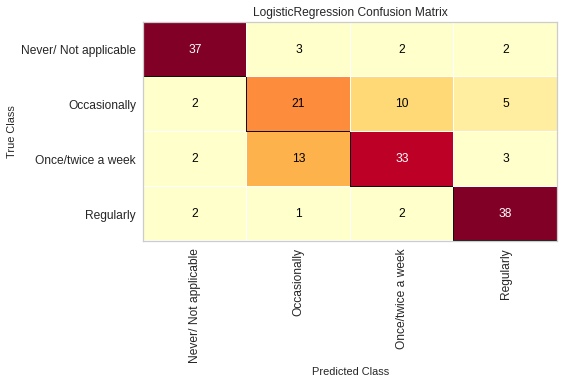

In [ ]:
visualizer = ConfusionMatrix(LogisticRegression(random_state=42, solver='liblinear'))
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

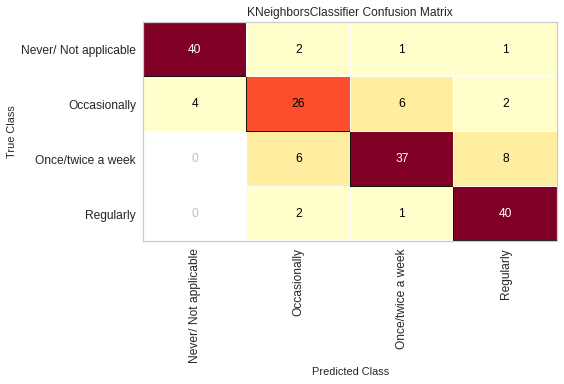

In [ ]:
visualizer = ConfusionMatrix(KNeighborsClassifier() )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

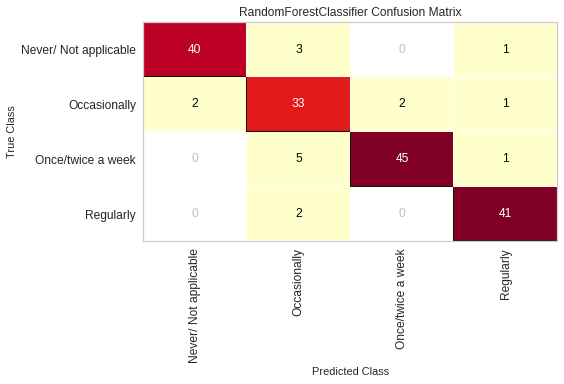

In [ ]:
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=1) )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

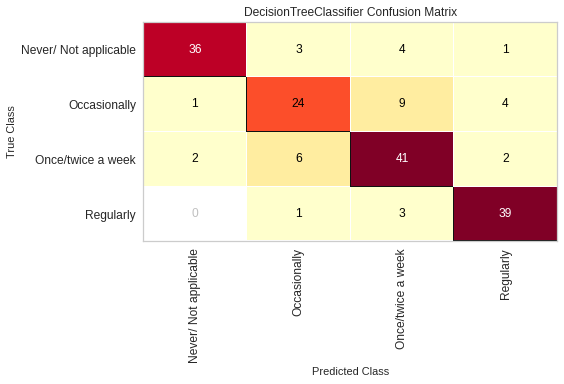

In [ ]:
visualizer = ConfusionMatrix(DecisionTreeClassifier() )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

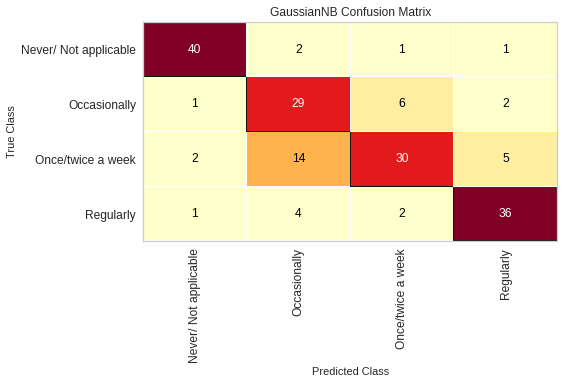

In [ ]:
visualizer = ConfusionMatrix(GaussianNB())
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

#Pictorail Representation of Percentage Confussion Matrix

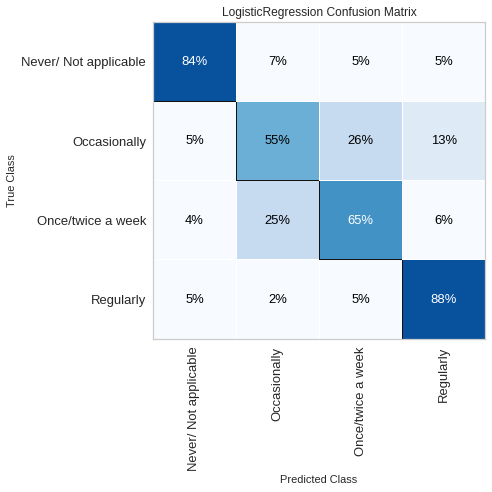

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(LogisticRegression(random_state=42, solver='liblinear'),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

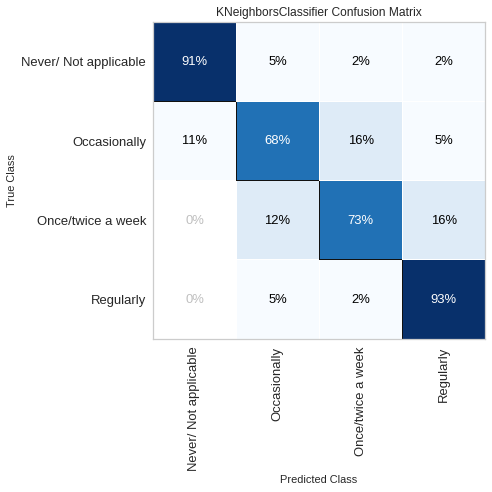

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(KNeighborsClassifier(),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

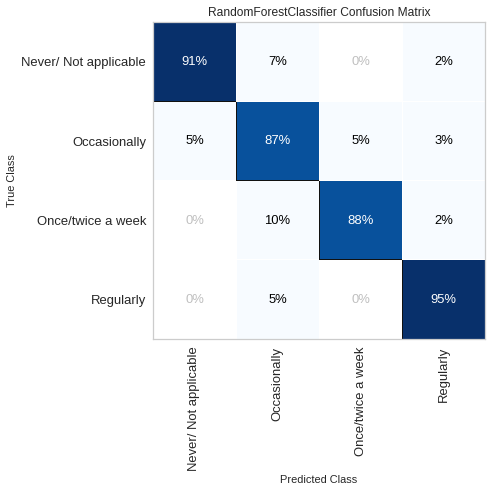

In [ ]:

from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(RandomForestClassifier(random_state=1),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

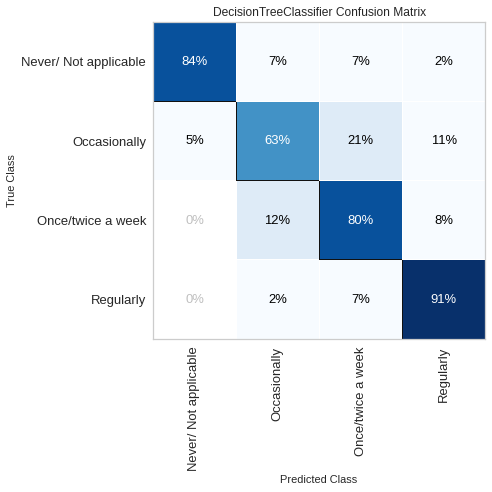

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(DecisionTreeClassifier() ,
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

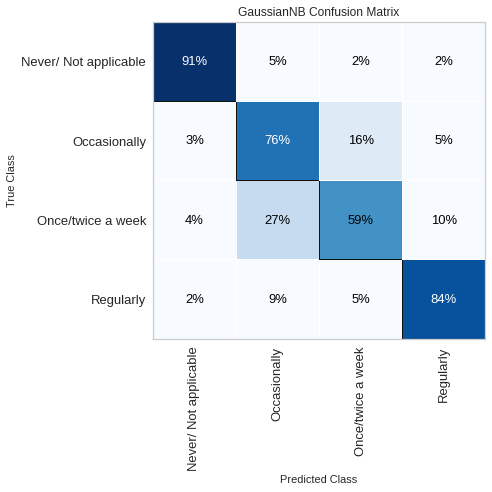

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(GaussianNB(),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

#Pictorail Representation of ROC

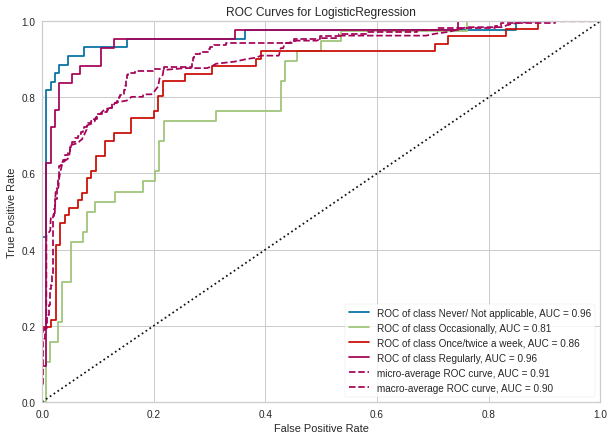

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(LogisticRegression(random_state=42, solver='liblinear'),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

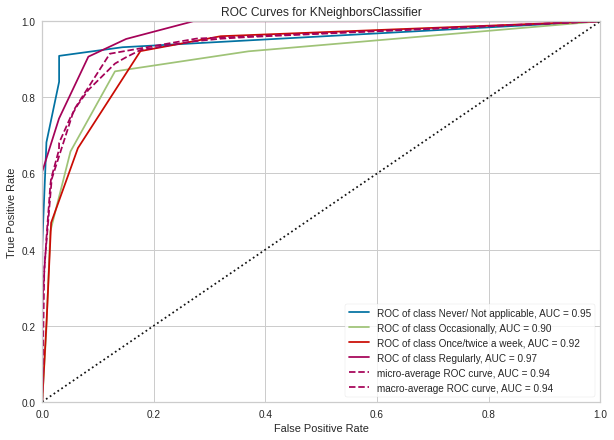

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(KNeighborsClassifier(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

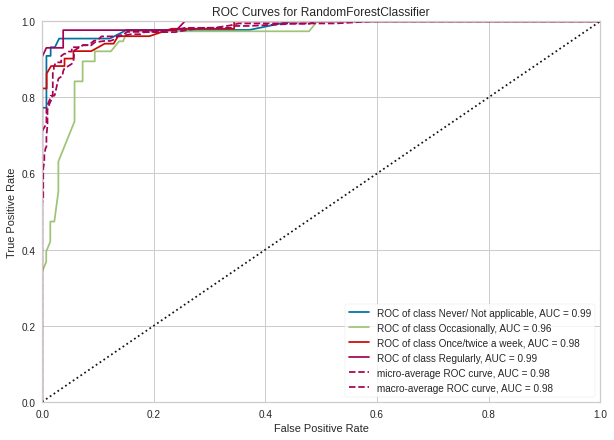

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(RandomForestClassifier(random_state=1),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

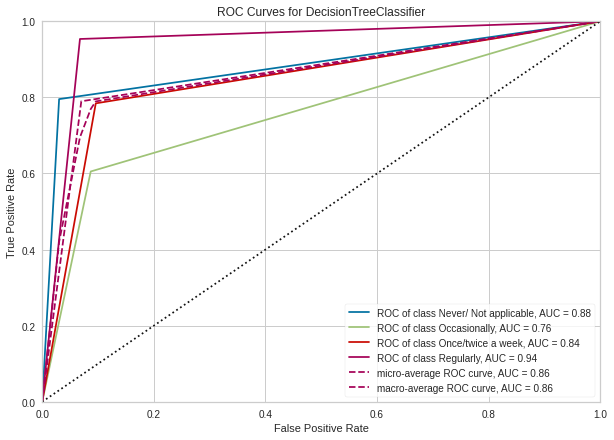

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(DecisionTreeClassifier(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

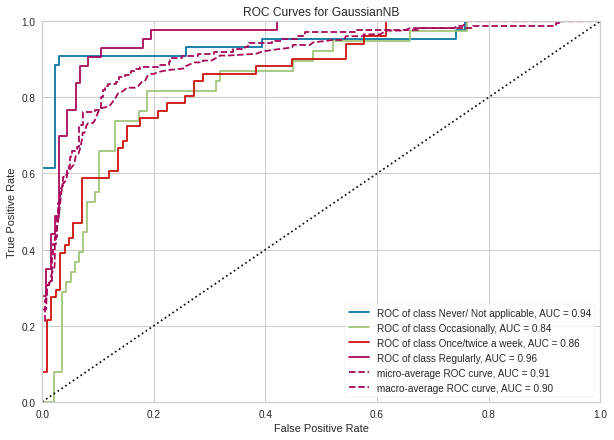

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(GaussianNB(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

# Pictorail Representation of Precision Recall

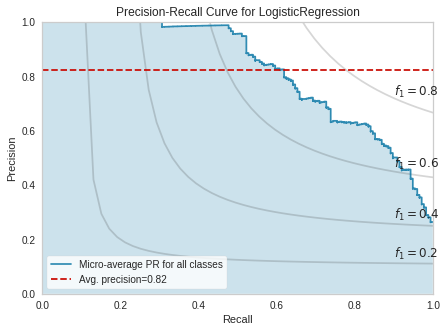

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(random_state=42, solver='liblinear'),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

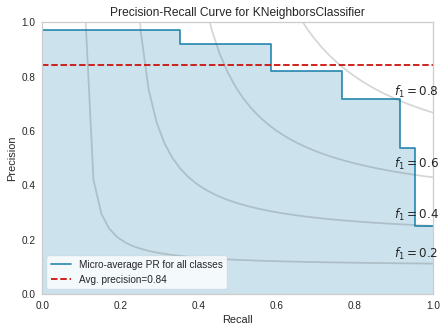

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(KNeighborsClassifier(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

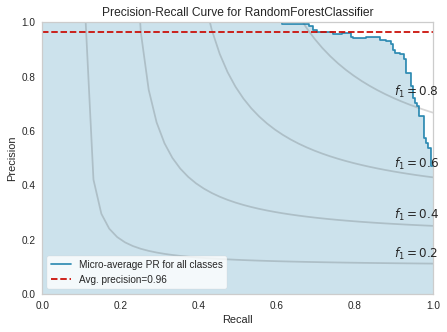

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RandomForestClassifier(random_state=1),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

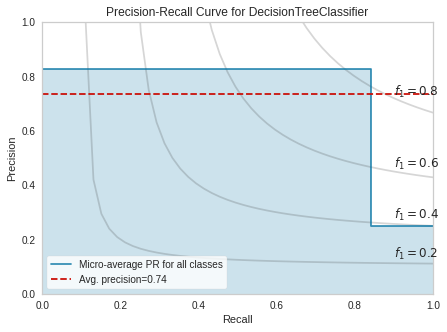

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(DecisionTreeClassifier(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

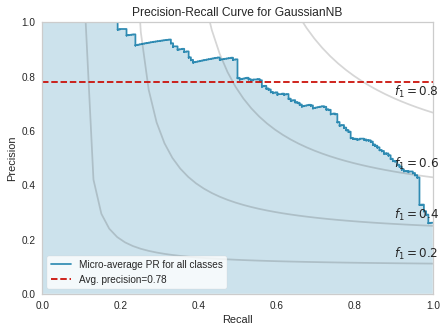

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(GaussianNB(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

##Pictorial Representaion of Recall Curve

/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


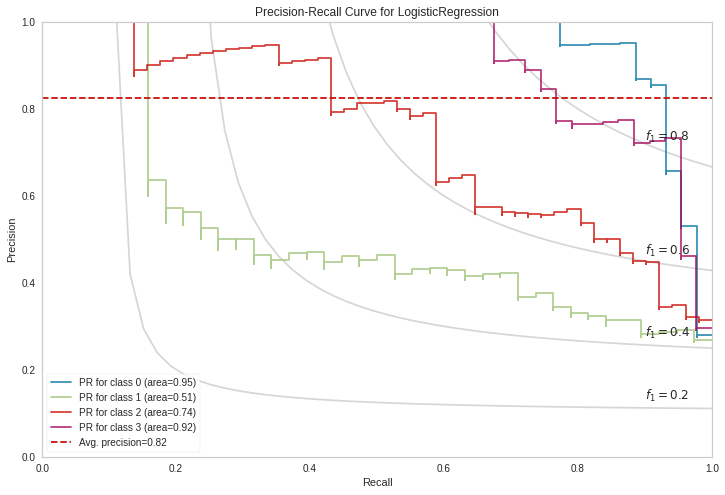

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(LogisticRegression(random_state=42, solver='liblinear'),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


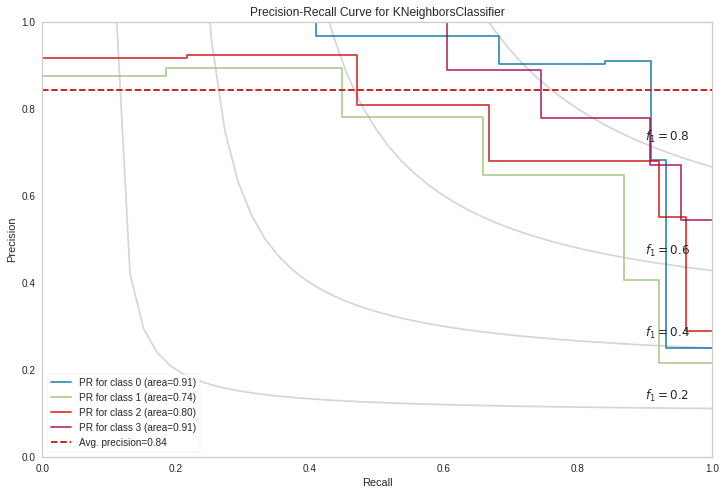

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(KNeighborsClassifier(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


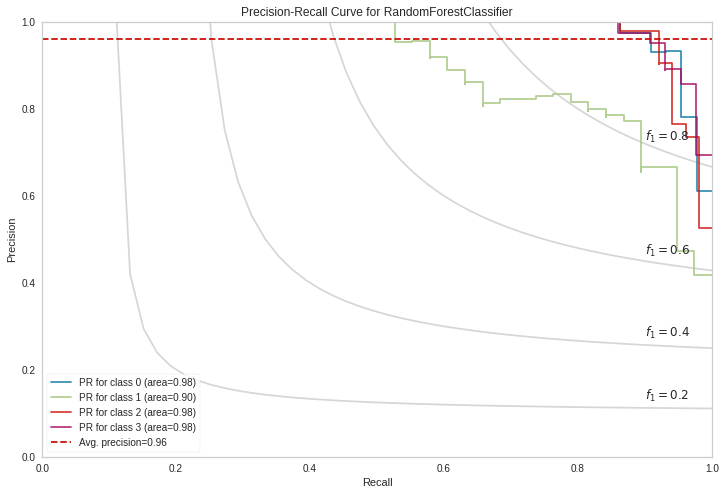

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(RandomForestClassifier(random_state=1),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


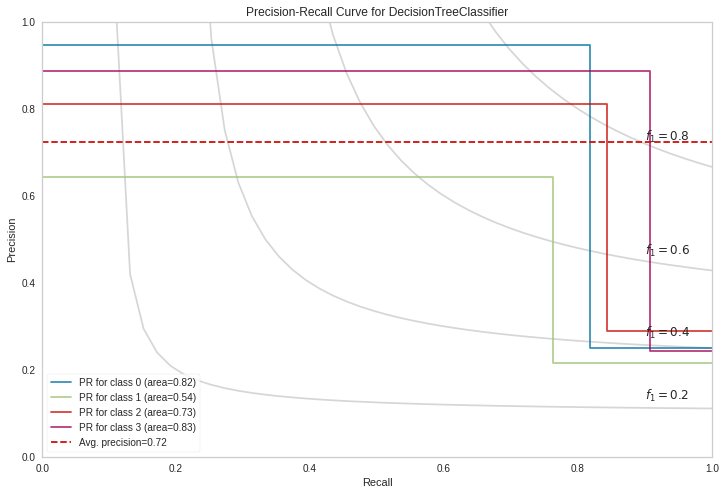

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(DecisionTreeClassifier(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


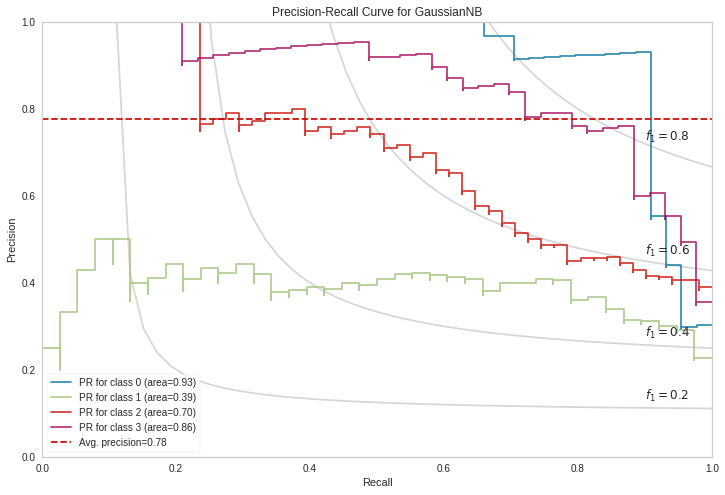

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(GaussianNB(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


#Pictorial Error Representation of Class 



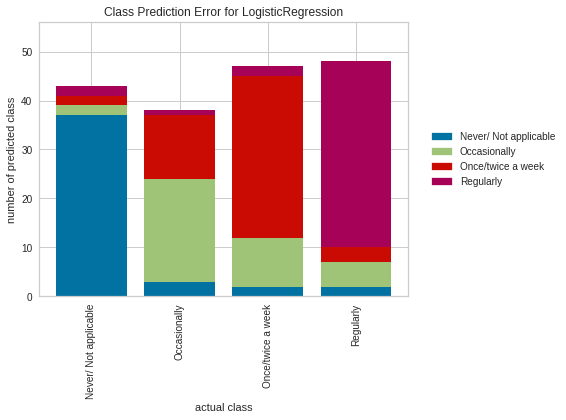

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(LogisticRegression(random_state=42, solver='liblinear'),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

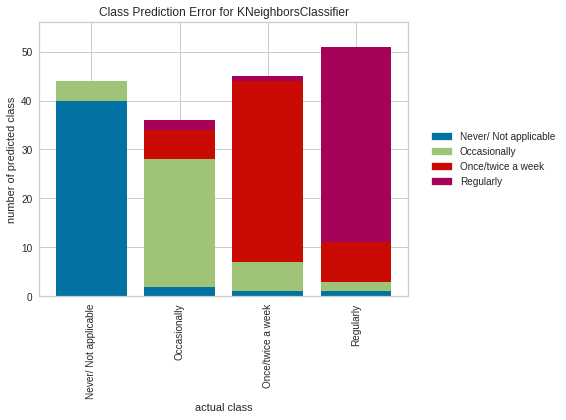

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(KNeighborsClassifier(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

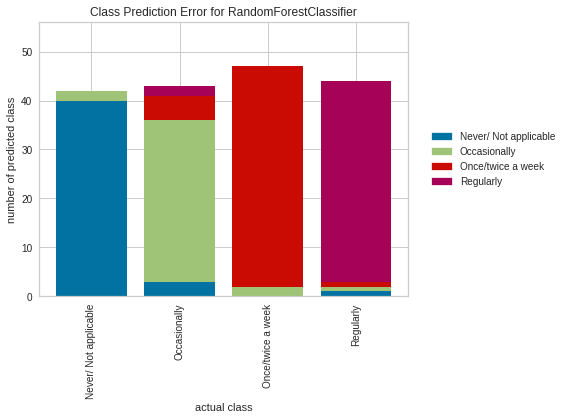

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(RandomForestClassifier(random_state=1),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

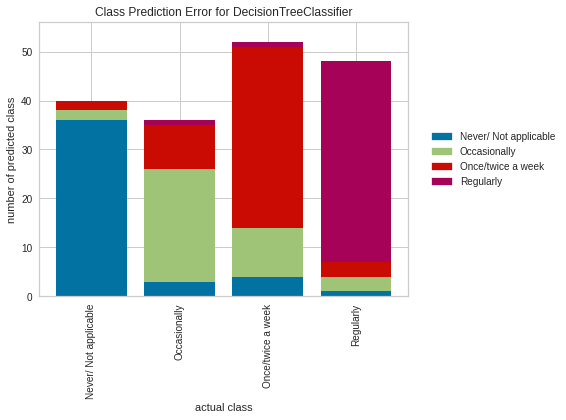

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(DecisionTreeClassifier(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

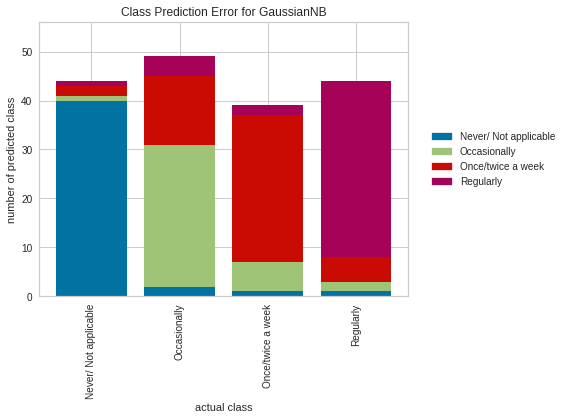

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(GaussianNB(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();